# Daten von MongoDB direkt laden
Zum Laden der Daten von der MongoDB muss man im HS-VPN sein!
intro in MongoDB-Queries: [click me](https://docs.mongodb.com/manual/tutorial/query-documents/)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pymongo import MongoClient
import mongodb_connection
from datetime import datetime

In [ ]:
client = MongoClient(mongodb_connection.connectionstring)
db = client.DMG_CELOS_MOBILE_V3_CA
collection = db["values"]
# for a first, get documents between 26.11.2019, 9:30 and 26.11.2019, 23:59
# only get documents with ValueID = 12430012063.X1_Axis.Actual_Position_MCS
vID = "12430012063.X1_Axis.Actual_Position_MCS"
tsStart = datetime(2019,11,26,12,15)
tsEnd = datetime(2019,11,26,13,10) # durch versuche herausgefunden (plotten der X-Position)
cursor = collection.find({
    'timeStamp' : {'$gt':tsStart, '$lt':tsEnd} # $gt: greater than, $lt: less than
})
df = pd.DataFrame(columns=['_id','ValueID','value','timeStamp'])
i = 0
for item in cursor:
    df.loc[i] = [item['_id'],item['ValueID'],item['value_number'],item['timeStamp']]
    i+=1
print(df.shape)

In [27]:
print(df.dtypes)
print(df.shape)
print(df.iloc[131167])

_id                  object
ValueID              object
value               float64
timeStamp    datetime64[ns]
dtype: object
(131168, 4)
_id                                   5ddd25148e15b3086c07bed5
ValueID      12430012063.Tool_Control_Center.Axial_Force_Co...
value                                                        0
timeStamp                           2019-11-26 13:15:16.601000
Name: 131167, dtype: object


In [37]:
df.head()

,_id,ValueID,value,timeStamp
0,5ddd16f38e15b3086c052889,12430012063.Energy_Savings.Active_Power_X1,24.362,2019-11-26 12:15:00.115
1,5ddd16f38e15b3086c05288b,12430012063.X1_Axis.Actual_Position_MCS,315.510,2019-11-26 12:15:00.139
2,5ddd16f38e15b3086c05288c,12430012063.Main_Spindle.MPC_Veff_Total,0.000,2019-11-26 12:15:00.142
3,5ddd16f38e15b3086c05288d,12430012063.Energy_Savings.Active_Power_Spindle1,38.350,2019-11-26 12:15:00.175
4,5ddd16f38e15b3086c05288e,12430012063.Main_Spindle.Actual_Power,0.000,2019-11-26 12:15:00.176


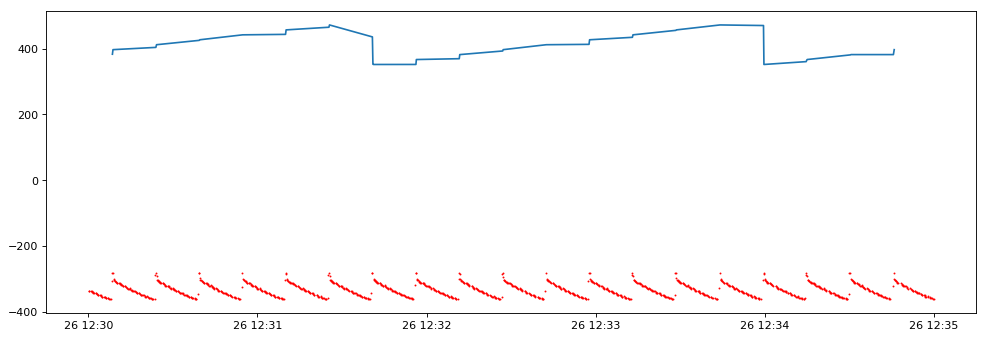

In [45]:
tsStart = datetime(2019,11,26,12,30)
tsEnd = datetime(2019,11,26,12,35)
plt.figure(figsize=(15, 5), dpi=80)
plt.plot(df.loc[lambda l: (l['ValueID']=="12430012063.X1_Axis.Actual_Position_MCS") & (tsStart < l['timeStamp'])& (l['timeStamp'] < tsEnd), "timeStamp"],df.loc[lambda l: (l['ValueID']=="12430012063.X1_Axis.Actual_Position_MCS") & (tsStart < l['timeStamp'])& (l['timeStamp'] < tsEnd), 'value']) #.loc[lambda l: (tsStart < l['timeStamp']) & (l['timeStamp'] < tsEnd),'timeStamp'],df.loc[lambda l: (tsStart < l['timeStamp']) & (l['timeStamp'] < tsEnd),'value'])
plt.scatter(df.loc[lambda l: (l['ValueID']=="12430012063.Z1_Axis.Actual_Position_MCS") & (tsStart < l['timeStamp'])& (l['timeStamp'] < tsEnd), "timeStamp"],df.loc[lambda l: (l['ValueID']=="12430012063.Z1_Axis.Actual_Position_MCS") & (tsStart < l['timeStamp'])& (l['timeStamp'] < tsEnd), "value"], s=0.5,c='r')                
plt.show()

In [36]:
#only uncomment for export
#df.to_csv("2019-11-26_export.csv", index=False)